In [25]:
# Step 1: Load the dataset from URL using Pandas
import pandas as pd

  # Replace with your actual dataset URL
df = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv")

# Step 2: Inspect for missing values and handle them
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Handle missing values (example: fill with median for numerical columns)
df.fillna(df.median(), inplace=True)

# Step 3: Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check the first few rows and data types
print(df.head())
print(df.info())


Missing values:
 Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


C:\Users\sai nanda G\AppData\Local\Temp\ipykernel_7232\1262957913.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


        Date      Country  Confirmed  Recovered  Deaths
0 2020-01-22  Afghanistan          0          0       0
1 2020-01-23  Afghanistan          0          0       0
2 2020-01-24  Afghanistan          0          0       0
3 2020-01-25  Afghanistan          0          0       0
4 2020-01-26  Afghanistan          0          0       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB
None


In [2]:
# Display basic information about the dataset
print("Number of rows and columns:", df.shape)
print("Data types:\n", df.dtypes)

# Identify and handle outliers or inconsistencies (example: remove outliers)
# Assuming 'cases' column for illustration
Q1 = df['Confirmed'].quantile(0.25)
Q3 = df['Confirmed'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Confirmed'] < (Q1 - 1.5 * IQR)) | (df['Confirmed'] > (Q3 + 1.5 * IQR)))]

# Confirm outlier removal
print("After outlier removal, rows:", df.shape[0])


Number of rows and columns: (161568, 5)
Data types:
 Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object
After outlier removal, rows: 137023


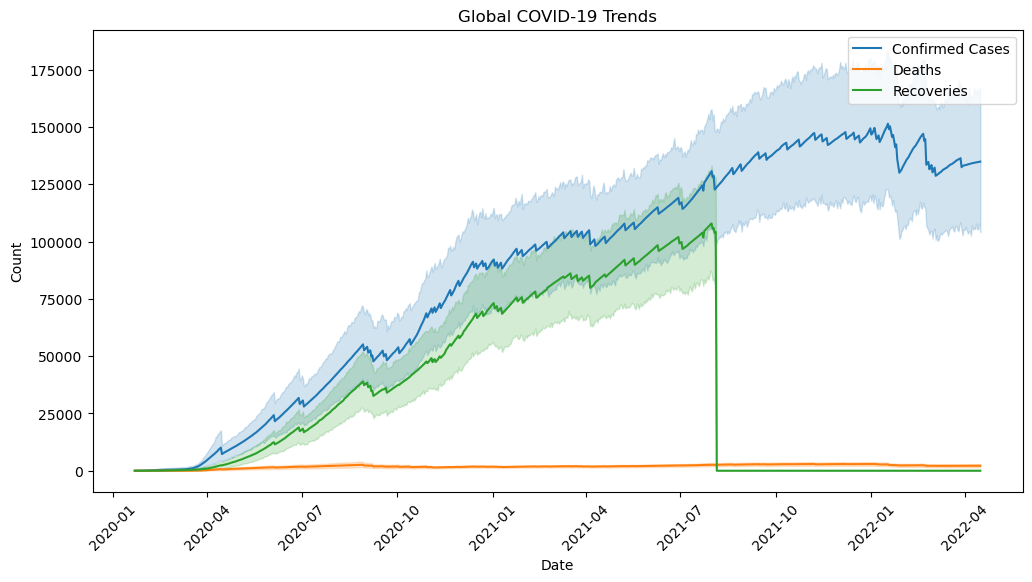

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot global trends: confirmed cases, deaths, recoveries over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed', data=df, label='Confirmed Cases')
sns.lineplot(x='Date', y='Deaths', data=df, label='Deaths')
sns.lineplot(x='Date', y='Recovered', data=df, label='Recoveries')
plt.title('Global COVID-19 Trends')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


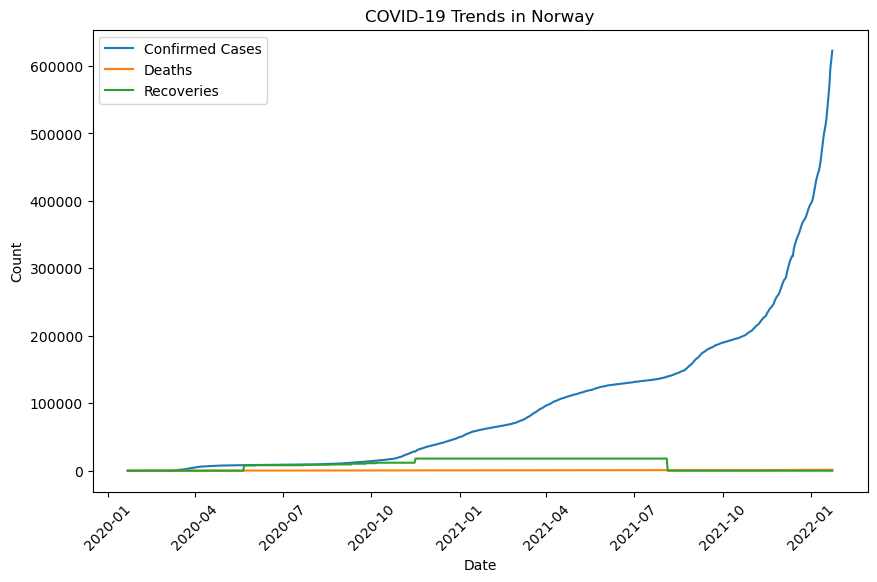

In [4]:
# User specifies a country
country_name = 'Norway'  # Replace with the country you want to analyze

# Filter data for the specified country
country_data = df[df['Country'] == country_name]

# Plot COVID-19 trends for the specific country
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Confirmed', data=country_data, label='Confirmed Cases')
sns.lineplot(x='Date', y='Deaths', data=country_data, label='Deaths')
sns.lineplot(x='Date', y='Recovered', data=country_data, label='Recoveries')
plt.title(f'COVID-19 Trends in {country_name}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


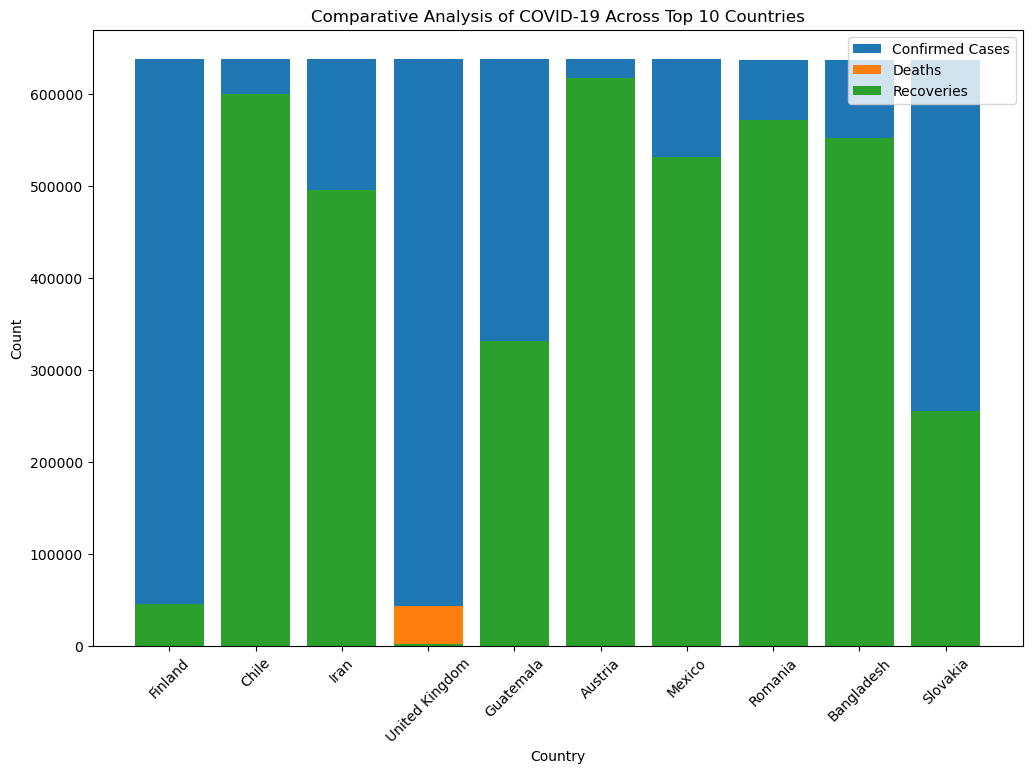

In [5]:
# Bar plots to compare top 10 most affected countries
top_10_countries = df.groupby('Country').max().nlargest(10, 'Confirmed')

plt.figure(figsize=(12, 8))
plt.bar(top_10_countries.index, top_10_countries['Confirmed'], label='Confirmed Cases')
plt.bar(top_10_countries.index, top_10_countries['Deaths'], label='Deaths')
plt.bar(top_10_countries.index, top_10_countries['Recovered'], label='Recoveries')
plt.title('Comparative Analysis of COVID-19 Across Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


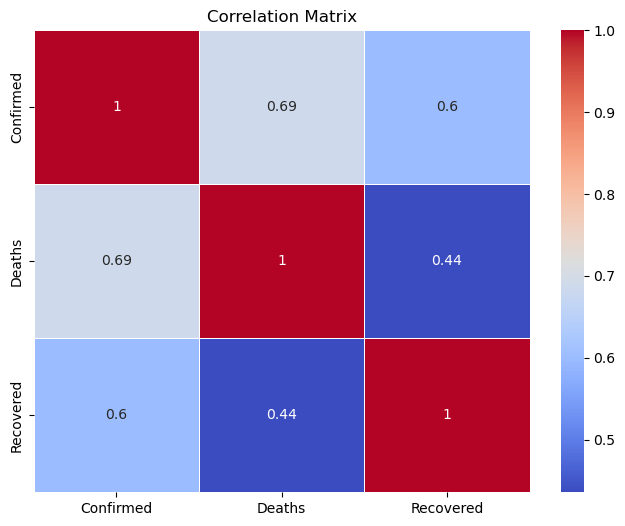

In [6]:
# Correlation analysis between confirmed cases and deaths
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


1. What is the trend of confirmed cases, deaths, and recoveries globally over time? Draw plots separately.

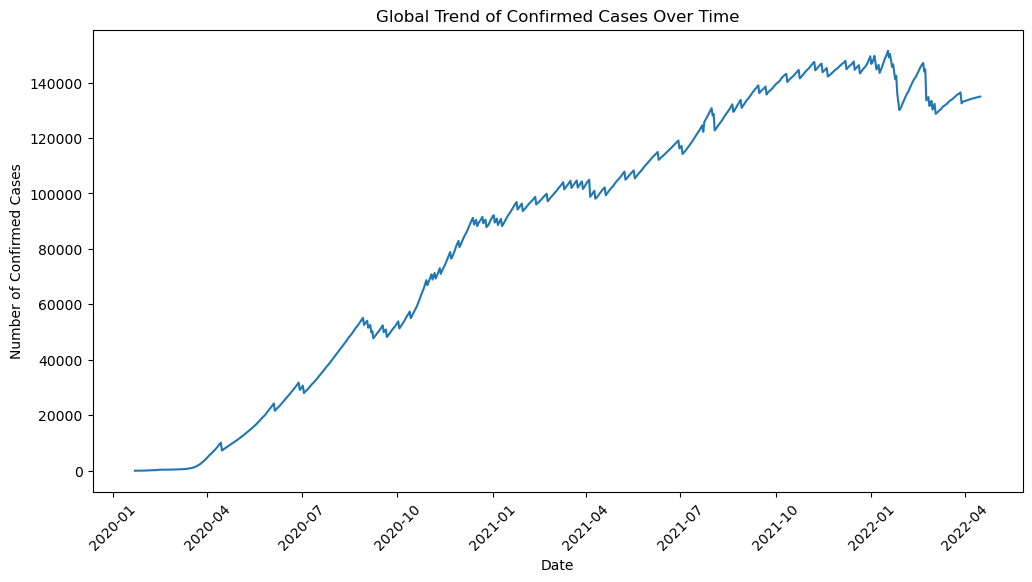

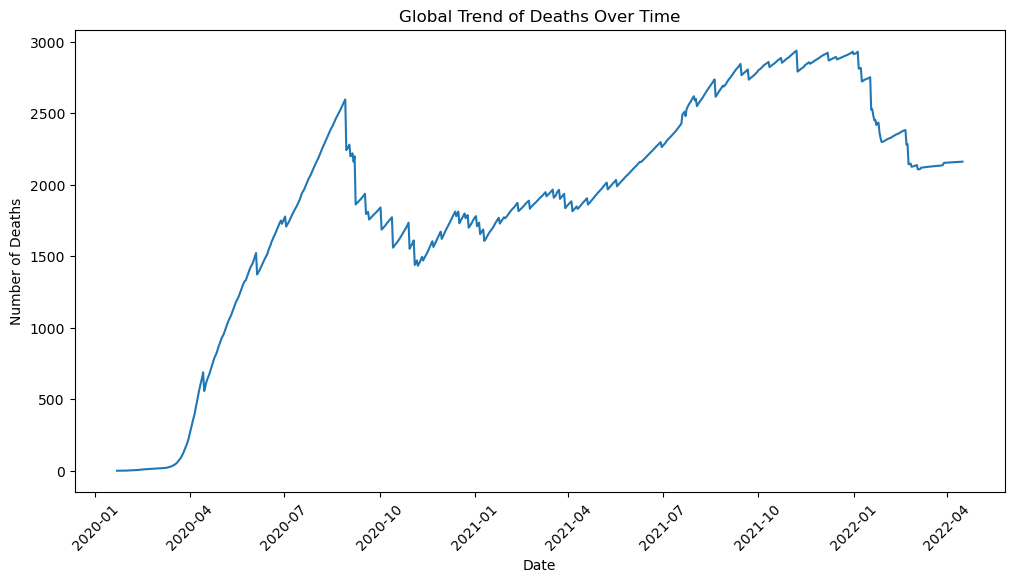

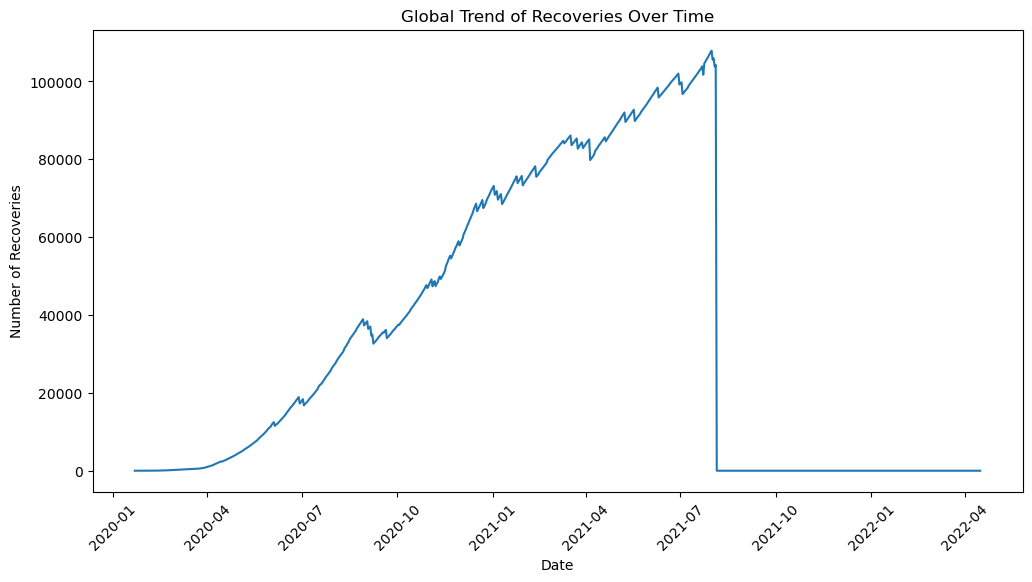

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trend of confirmed cases globally over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed', data=df, ci=None)
plt.title('Global Trend of Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

# Trend of deaths globally over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Deaths', data=df, ci=None)
plt.title('Global Trend of Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()

# Trend of recoveries globally over time
if 'Recovered' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Recovered', data=df, ci=None)
    plt.title('Global Trend of Recoveries Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Recoveries')
    plt.xticks(rotation=45)
    plt.show()


2. Which country has the highest number of confirmed cases, deaths, and recoveries as of the latest date in the dataset?

In [11]:
latest_date = df['Date'].max()
latest_data = df[df['Date'] == latest_date]

max_confirmed = latest_data.loc[latest_data['Confirmed'].idxmax()]
max_deaths = latest_data.loc[latest_data['Deaths'].idxmax()]
max_recovered = latest_data.loc[latest_data['Recovered'].idxmax()] if 'Recovered' in df.columns else None

print("Country with the highest number of confirmed cases as of", latest_date, ":", max_confirmed['Country'])
print("Country with the highest number of deaths as of", latest_date, ":", max_deaths['Country'])
if max_recovered is not None:
    print("Country with the highest number of recoveries as of", latest_date, ":", max_recovered['Country'])


Country with the highest number of confirmed cases as of 2022-04-16 00:00:00 : Kuwait
Country with the highest number of deaths as of 2022-04-16 00:00:00 : Egypt
Country with the highest number of recoveries as of 2022-04-16 00:00:00 : Afghanistan


3. How do the trends of confirmed cases differ between the top 5 most affected countries?

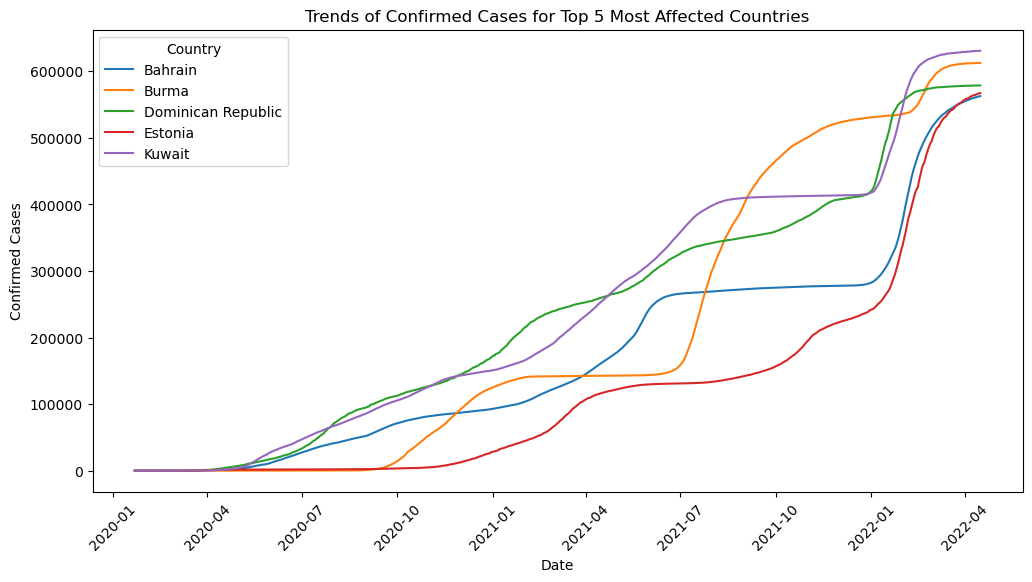

In [12]:
top_5_countries = latest_data.nlargest(5, 'Confirmed')['Country']
top_5_data = df[df['Country'].isin(top_5_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed', hue='Country', data=top_5_data)
plt.title('Trends of Confirmed Cases for Top 5 Most Affected Countries')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()


4. What is the growth rate of confirmed cases, deaths, and recoveries globally?

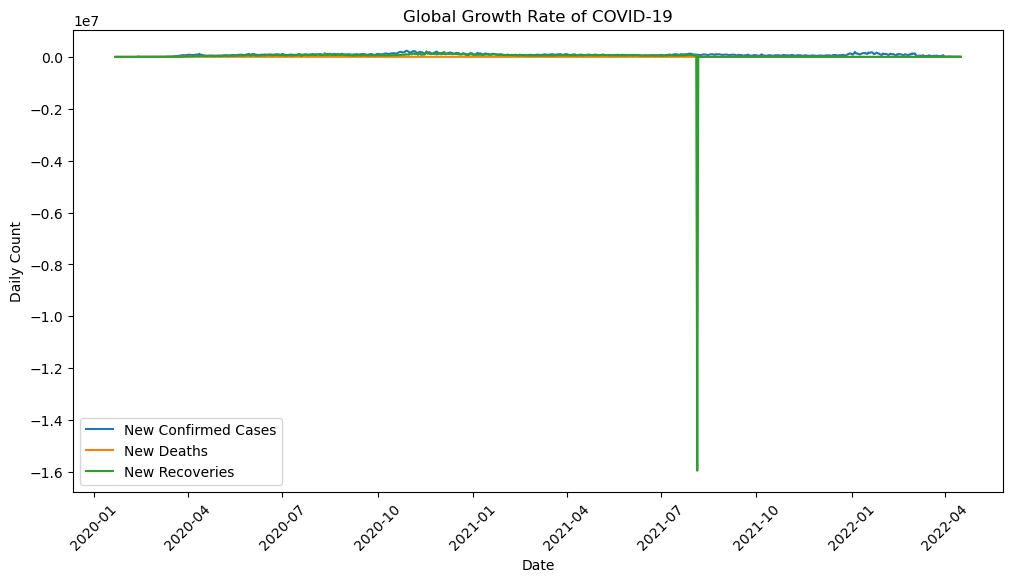

In [13]:
# Calculate daily new cases, deaths, and recoveries
df['New_Confirmed'] = df.groupby('Country')['Confirmed'].diff().fillna(0)
df['New_Deaths'] = df.groupby('Country')['Deaths'].diff().fillna(0)
if 'Recovered' in df.columns:
    df['New_Recovered'] = df.groupby('Country')['Recovered'].diff().fillna(0)

# Global growth rate
global_data = df.groupby('Date').sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='New_Confirmed', data=global_data, label='New Confirmed Cases')
sns.lineplot(x='Date', y='New_Deaths', data=global_data, label='New Deaths')
if 'Recovered' in df.columns:
    sns.lineplot(x='Date', y='New_Recovered', data=global_data, label='New Recoveries')
plt.title('Global Growth Rate of COVID-19')
plt.xlabel('Date')
plt.ylabel('Daily Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


5. What are the cumulative confirmed cases, deaths, and recoveries for the top 10 most affected countries?

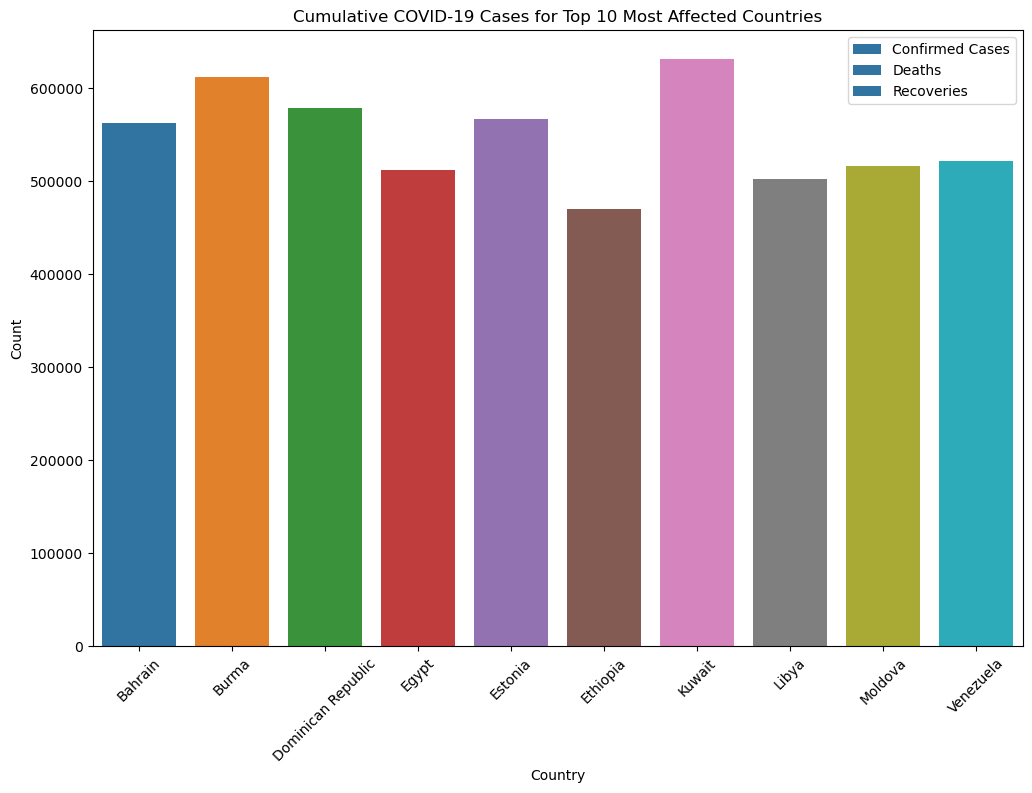

In [14]:
top_10_countries = latest_data.nlargest(10, 'Confirmed')['Country']
top_10_data = df[df['Country'].isin(top_10_countries)]

# Cumulative plots
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Confirmed', data=top_10_data.groupby('Country').max().reset_index(), label='Confirmed Cases')
sns.barplot(x='Country', y='Deaths', data=top_10_data.groupby('Country').max().reset_index(), label='Deaths')
if 'Recovered' in df.columns:
    sns.barplot(x='Country', y='Recovered', data=top_10_data.groupby('Country').max().reset_index(), label='Recoveries')
plt.title('Cumulative COVID-19 Cases for Top 10 Most Affected Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


6. How does the recovery rate compare across different countries?

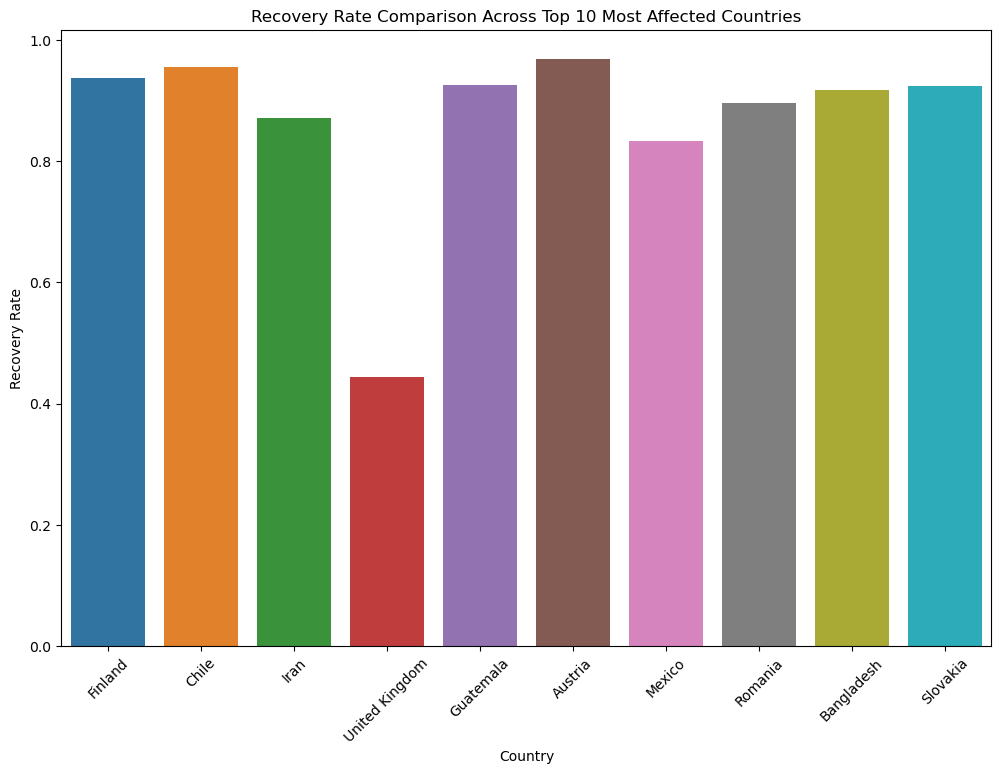

In [15]:
# Calculate recovery rate
if 'Recovered' in df.columns:
    df['Recovery_Rate'] = df['Recovered'] / df['Confirmed']

    plt.figure(figsize=(12, 8))
    recovery_data = df.groupby('Country').max().reset_index().nlargest(10, 'Confirmed')
    sns.barplot(x='Country', y='Recovery_Rate', data=recovery_data)
    plt.title('Recovery Rate Comparison Across Top 10 Most Affected Countries')
    plt.xlabel('Country')
    plt.ylabel('Recovery Rate')
    plt.xticks(rotation=45)
    plt.show()


7. What is the correlation between confirmed cases, deaths, and recoveries globally?

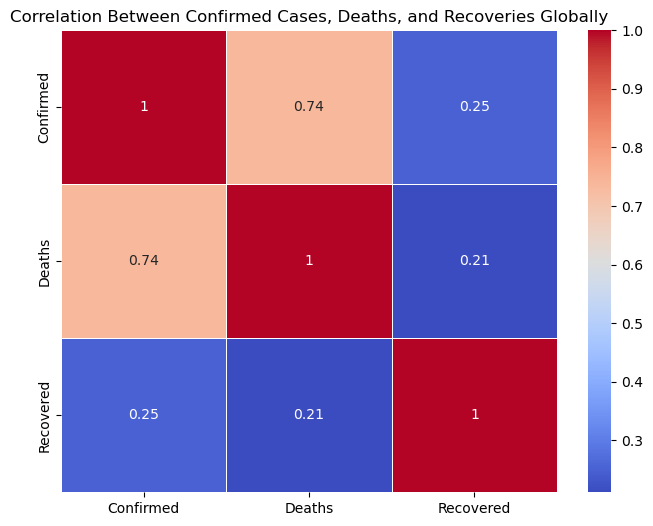

In [16]:
correlation_matrix = global_data[['Confirmed', 'Deaths', 'Recovered']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Between Confirmed Cases, Deaths, and Recoveries Globally')
plt.show()


8. How do lockdown measures impact the trend of confirmed cases in different countries?

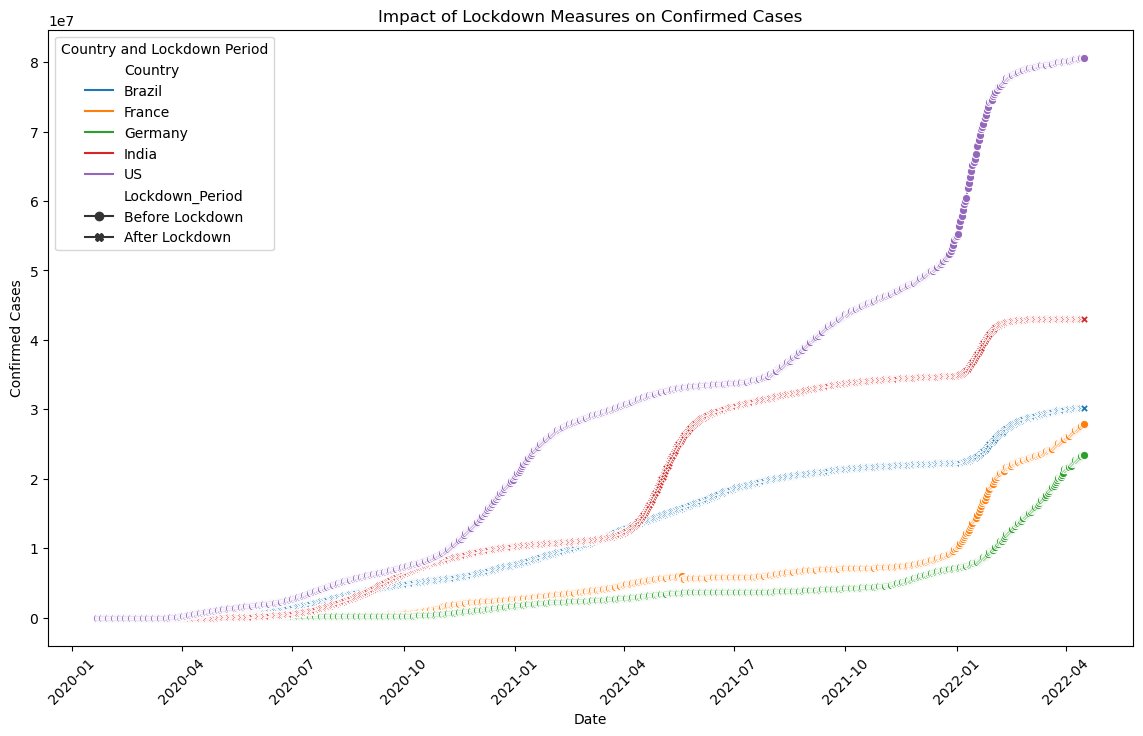

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset from URL using Pandas
df = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv")

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check if 'Recovered' column exists
if 'Recovered' not in df.columns:
    df['Recovered'] = np.nan

# Sample lockdown data (replace this with actual data)
lockdown_data = {
    'Country': ['USA', 'India', 'Brazil', 'Russia', 'UK'],
    'Lockdown_Start': ['2020-03-19', '2020-03-24', '2020-03-18', '2020-03-30', '2020-03-23']
}

lockdown_df = pd.DataFrame(lockdown_data)
lockdown_df['Lockdown_Start'] = pd.to_datetime(lockdown_df['Lockdown_Start'])

# Merge lockdown data with COVID-19 data
df = df.merge(lockdown_df, on='Country', how='left')

# Create a column to indicate the period before and after lockdown
df['Lockdown_Period'] = np.where(df['Date'] >= df['Lockdown_Start'], 'After Lockdown', 'Before Lockdown')

# Filter data for the top 5 most affected countries (as an example)
latest_date = df['Date'].max()
latest_data = df[df['Date'] == latest_date]
top_5_countries = latest_data.nlargest(5, 'Confirmed')['Country']
top_5_data = df[df['Country'].isin(top_5_countries)]

# Plot trends of confirmed cases before and after lockdown
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Confirmed', hue='Country', style='Lockdown_Period', data=top_5_data, markers=True, dashes=False)
plt.title('Impact of Lockdown Measures on Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.legend(title='Country and Lockdown Period')
plt.show()


9. How does the number of tests conducted relate to the number of confirmed cases in various countries?

C:\Users\sai nanda G\AppData\Local\Temp\ipykernel_7232\1463641334.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


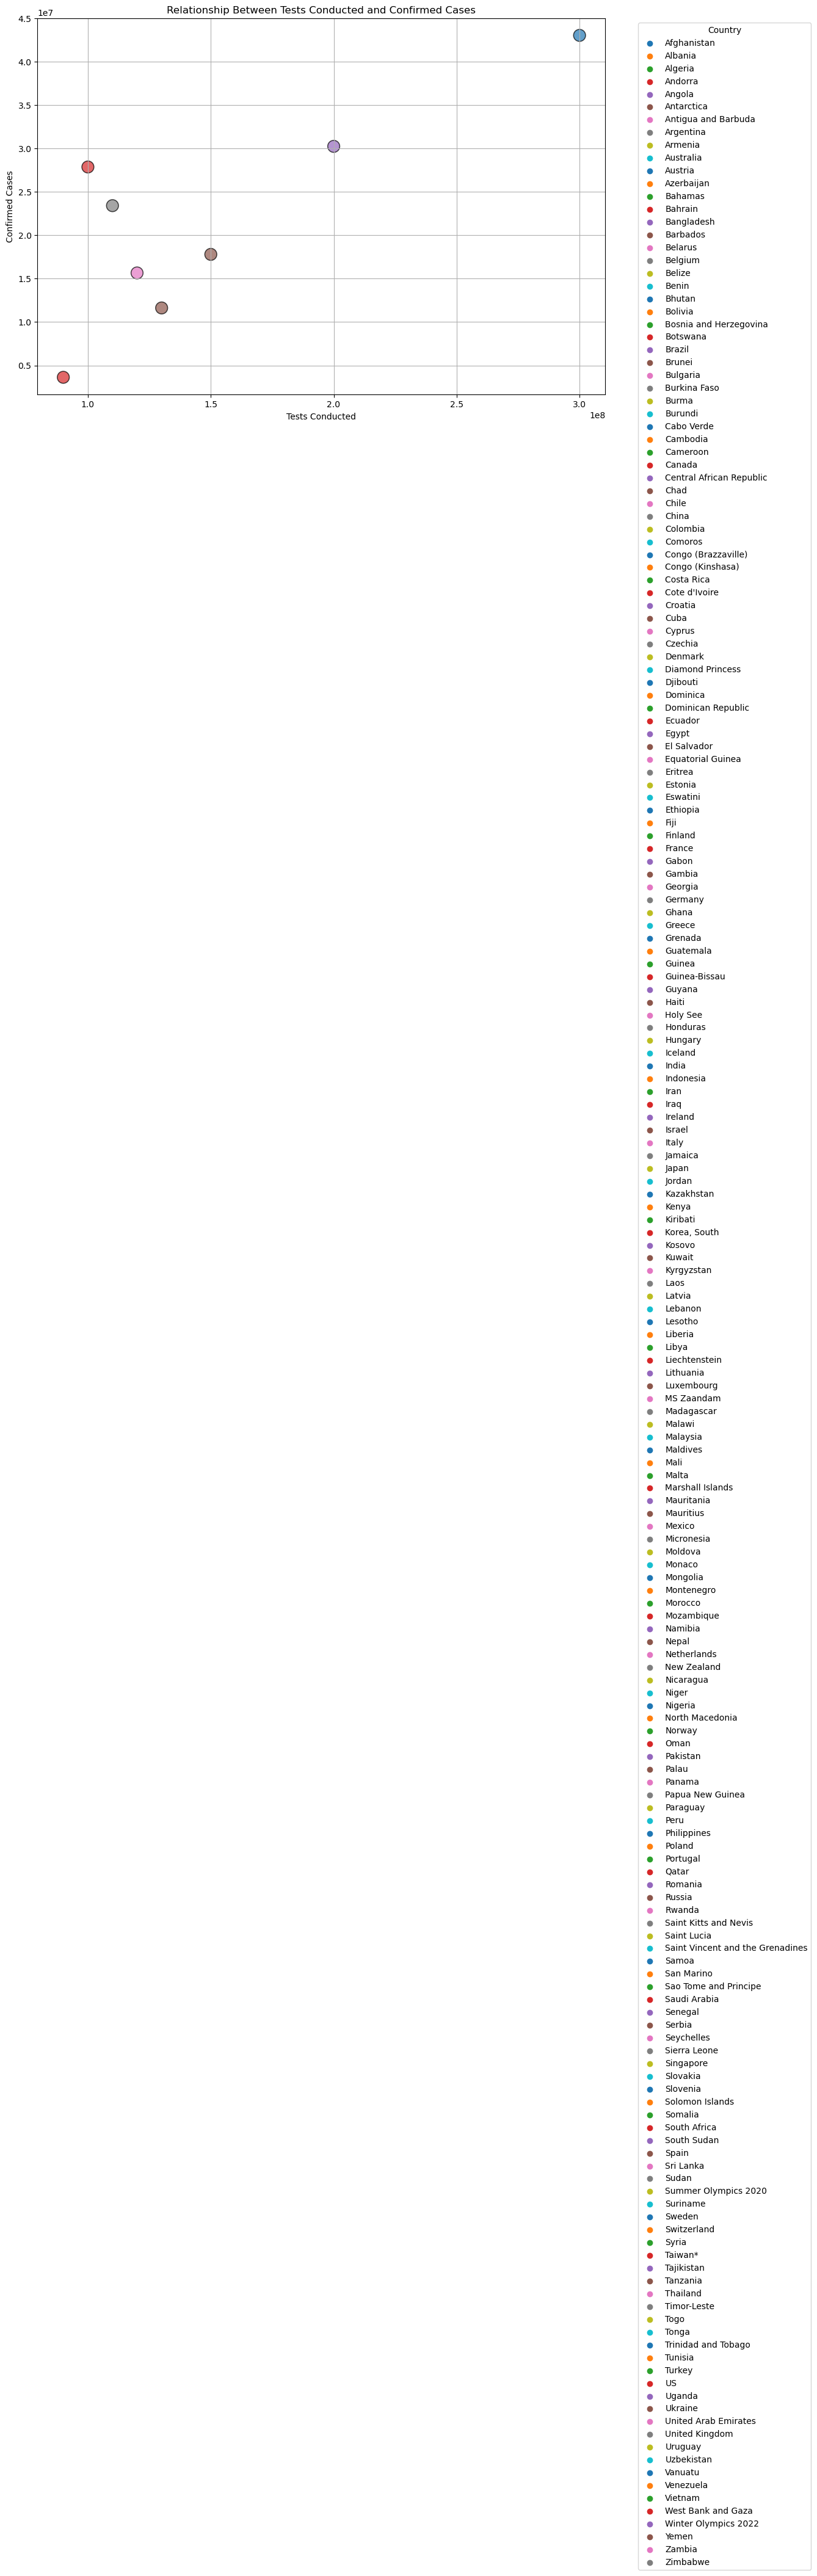

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from URL using Pandas
df = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv")

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Expanded sample test data (replace this with actual data)
test_data = {
    'Country': ['USA', 'India', 'Brazil', 'Russia', 'UK', 'Spain', 'Italy', 'Germany', 'France', 'Canada'],
    'Tests_Conducted': [500000000, 300000000, 200000000, 150000000, 180000000, 130000000, 120000000, 110000000, 100000000, 90000000]  # Mock data
}

test_df = pd.DataFrame(test_data)

# Merge test data with COVID-19 data
latest_date = df['Date'].max()
latest_data = df[df['Date'] == latest_date]

merged_df = latest_data.merge(test_df, on='Country', how='left')

# Plot the relationship between tests conducted and confirmed cases
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Tests_Conducted', y='Confirmed', hue='Country', data=merged_df, s=200, palette='tab10', edgecolor='black', alpha=0.7)
plt.title('Relationship Between Tests Conducted and Confirmed Cases')
plt.xlabel('Tests Conducted')
plt.ylabel('Confirmed Cases')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


10. What is the distribution of confirmed cases, deaths, and recoveries by continent?

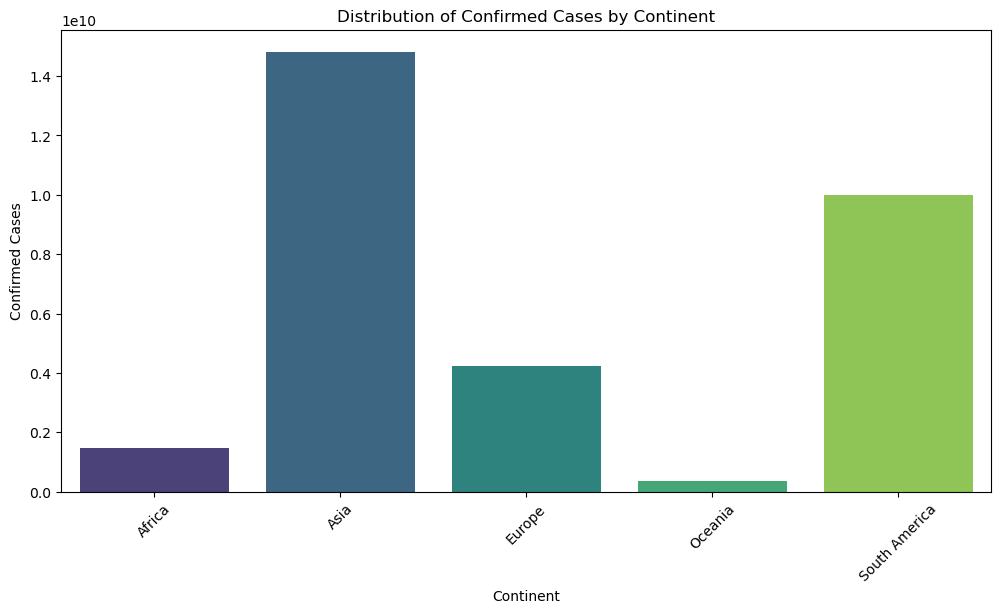

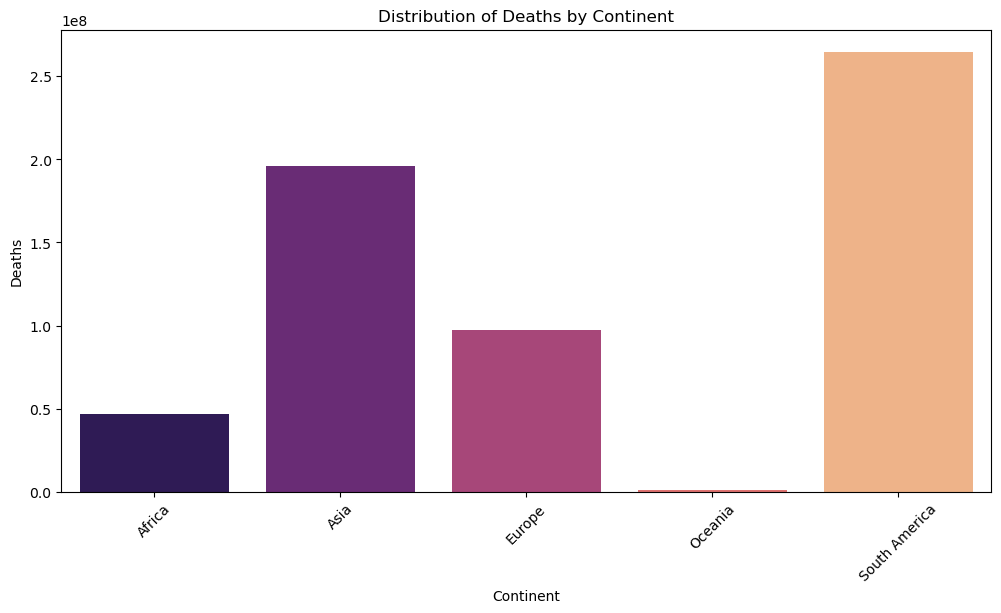

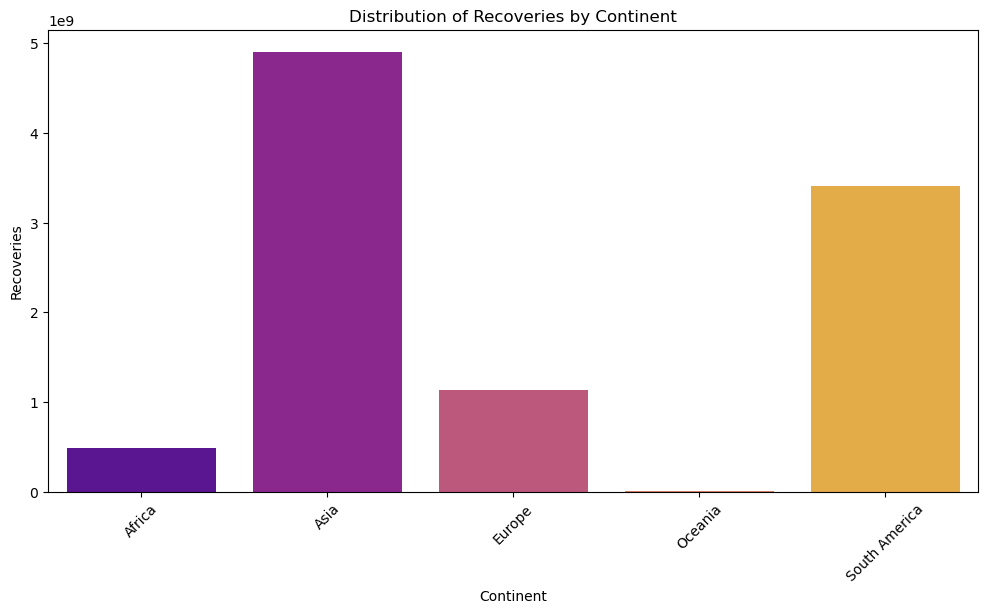

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset from URL using Pandas
df = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv")

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sample continent data (replace this with actual data)
continent_data = {
    'Country': ['USA', 'India', 'Brazil', 'Russia', 'UK', 'Norway', 'China', 'Australia', 'South Africa', 'Egypt'],
    'Continent': ['North America', 'Asia', 'South America', 'Europe', 'Europe', 'Europe', 'Asia', 'Oceania', 'Africa', 'Africa']
}

continent_df = pd.DataFrame(continent_data)

# Merge continent data with COVID-19 data
df = df.merge(continent_df, on='Country', how='left')

# Aggregate data by continent
continent_summary = df.groupby('Continent').sum().reset_index()

# Plot the distribution of confirmed cases by continent
plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='Confirmed', data=continent_summary, palette='viridis')
plt.title('Distribution of Confirmed Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of deaths by continent
plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='Deaths', data=continent_summary, palette='magma')
plt.title('Distribution of Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of recoveries by continent
plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='Recovered', data=continent_summary, palette='plasma')
plt.title('Distribution of Recoveries by Continent')
plt.xlabel('Continent')
plt.ylabel('Recoveries')
plt.xticks(rotation=45)
plt.show()
